<a href="https://colab.research.google.com/github/Ank1taS/Brain_Tumor_Detection/blob/main/brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# some info about GPU
!nvidia-smi

Sun Jul  2 07:19:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import preprocessing


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import cv2
import os

print(os.listdir("/content/drive/MyDrive/Machine learning/Data_Sets/brain_tumor_dataset"))



['no', 'yes']


In [9]:
# path of directory
img_dir = "/content/drive/MyDrive/Machine learning/Data_Sets/brain_tumor_dataset"

In [10]:
# os.listdir(f"{img_dir}")
os.listdir(img_dir)


['no', 'yes']

In [11]:
batch_size = 32
img_height, img_width = 120, 120

In [12]:
# load training data set
train_data = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    labels = 'inferred',
    label_mode = 'binary',
    validation_split = 0.2,
    subset = 'training',
    seed = 2,
    image_size = (img_height, img_width),
    interpolation = 'nearest',
    batch_size = batch_size
)

Found 253 files belonging to 2 classes.
Using 203 files for training.


In [13]:
# load validation data set
validation_data = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    labels = 'inferred',
    label_mode = 'binary',
    validation_split = 0.2,
    subset = 'validation',
    seed = 2,
    image_size = (img_height, img_width),
    interpolation = 'nearest',
    batch_size = batch_size
)

Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [14]:
# print labels/ categories in data set
class_name = train_data.class_names
print(class_name)

['no', 'yes']


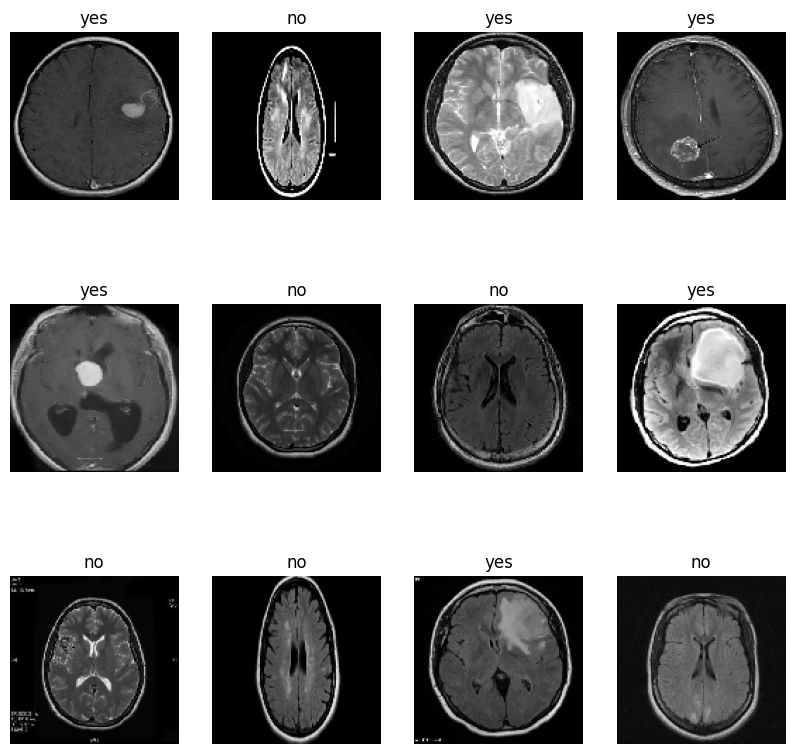

In [15]:
# print data set
plt.figure(figsize=(10,10))

for image, label in train_data.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)

    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_name[int(label[i])])
    plt.axis("off")



In [16]:
# shape of training data set and validation data set
print("Shape train_data set: ")
for img_batch, label_batch in train_data:
  print(img_batch.shape)
  print(label_batch.shape)
  break

print("Shape validation_data set: ")
for img_batch, label_batch in validation_data:
  print(img_batch.shape)
  print(label_batch.shape)
  break

print("Shape of data of training data set:")
for img_batch, label_batch in validation_data:
  print(img_batch[0].shape)
  print(label_batch[0].shape)
  break

print("Shape validation_data set: ")

for img_batch, label_batch in validation_data:
  print(img_batch.shape)
  print(label_batch.shape)
  break

Shape train_data set: 
(32, 120, 120, 3)
(32, 1)
Shape validation_data set: 
(32, 120, 120, 3)
(32, 1)
Shape of data of training data set:
(120, 120, 3)
(1,)
Shape validation_data set: 
(32, 120, 120, 3)
(32, 1)


### Preprocessing


In [23]:
# rescale = tf.keras.
normalization_layer = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(120,120,3))
])

## ANN

In [24]:
# ANN model
# model architecture for binary classification

ann = keras.models.Sequential(
    [
      normalization_layer,
      tf.keras.layers.Flatten(input_shape=(120,120,3)),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(50, activation="relu"),
      #  tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(25, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid"),
    ])

In [25]:

# compile the model
ann.compile(optimizer="adam",
            loss = "binary_crossentropy",
            metrics=["accuracy"])

In [26]:
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 120, 120, 3)       0         
                                                                 
 flatten_1 (Flatten)         (None, 43200)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               4320100   
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                

In [28]:
# fit model

ann_history = ann.fit(train_data, validation_data = validation_data, batch_size = batch_size, epochs = 10)

Epoch 1/10
7/7 [==============================] - 1s 28ms/step - loss: 0.3230 - accuracy: 0.8571 - val_loss: 0.6365 - val_accuracy: 0.8000
Epoch 2/10
7/7 [==============================] - 1s 29ms/step - loss: 0.3276 - accuracy: 0.8424 - val_loss: 0.6546 - val_accuracy: 0.7600
Epoch 3/10
7/7 [==============================] - 1s 28ms/step - loss: 0.2341 - accuracy: 0.9163 - val_loss: 0.6150 - val_accuracy: 0.7200
Epoch 4/10
7/7 [==============================] - 1s 25ms/step - loss: 0.2338 - accuracy: 0.9113 - val_loss: 0.7258 - val_accuracy: 0.7400
Epoch 5/10
7/7 [==============================] - 1s 29ms/step - loss: 0.2090 - accuracy: 0.9163 - val_loss: 0.9006 - val_accuracy: 0.7600
Epoch 6/10
7/7 [==============================] - 1s 26ms/step - loss: 0.2689 - accuracy: 0.9015 - val_loss: 0.9683 - val_accuracy: 0.7400
Epoch 7/10
7/7 [==============================] - 1s 29ms/step - loss: 0.2467 - accuracy: 0.8916 - val_loss: 0.8018 - val_accuracy: 0.7200
Epoch 8/10
7/7 [===========

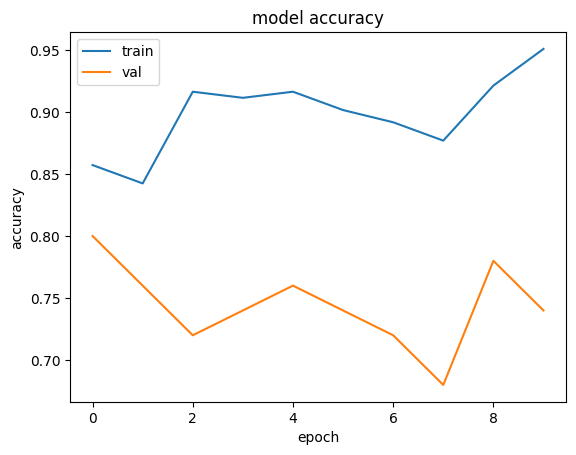

In [29]:
plt.plot(ann_history.history['accuracy'])
plt.plot(ann_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

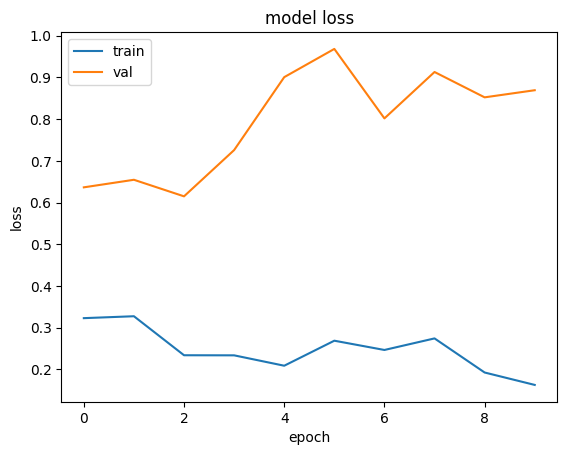

In [30]:
plt.plot(ann_history.history['loss'])
plt.plot(ann_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## CNN

In [57]:
# cnn model
# model architecture for binary classification

cnn = keras.models.Sequential([
    normalization_layer,
    # First Convolutional Block
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),

    # Third Convolutional Block
    tf.keras.layers.Conv2D(filters=138, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),

])

In [58]:
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 120, 120, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 120, 120, 32)      2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 30, 30, 138)      

In [59]:
# compile the model
cnn.compile(optimizer="adam",
            loss = "binary_crossentropy",
            metrics=["binary_accuracy"])

In [64]:
# fit model

cnn_history = cnn.fit(train_data, validation_data = validation_data, batch_size = batch_size, epochs = 10)

Epoch 1/10
7/7 [==============================] - 1s 76ms/step - loss: 0.0228 - binary_accuracy: 0.9951 - val_loss: 1.4798 - val_binary_accuracy: 0.7800
Epoch 2/10
7/7 [==============================] - 1s 53ms/step - loss: 0.0197 - binary_accuracy: 0.9951 - val_loss: 1.7085 - val_binary_accuracy: 0.7800
Epoch 3/10
7/7 [==============================] - 1s 40ms/step - loss: 0.0069 - binary_accuracy: 1.0000 - val_loss: 1.9330 - val_binary_accuracy: 0.7800
Epoch 4/10
7/7 [==============================] - 1s 43ms/step - loss: 0.0073 - binary_accuracy: 1.0000 - val_loss: 2.0170 - val_binary_accuracy: 0.7600
Epoch 5/10
7/7 [==============================] - 1s 39ms/step - loss: 0.0018 - binary_accuracy: 1.0000 - val_loss: 2.3842 - val_binary_accuracy: 0.7400
Epoch 6/10
7/7 [==============================] - 1s 42ms/step - loss: 0.0098 - binary_accuracy: 0.9901 - val_loss: 2.7329 - val_binary_accuracy: 0.7400
Epoch 7/10
7/7 [==============================] - 1s 42ms/step - loss: 0.0061 - bi